In [6]:
#DIABETES PREDICTION
# Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
#reading the csv file

data = pd.read_csv('diabetes.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [9]:
print(len(data))

768


In [10]:
print(data.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [11]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [13]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [16]:
#checking the distribution of dara in target variables

data["Outcome"].value_counts()/len(data)


Outcome
0    0.651042
1    0.348958
Name: count, dtype: float64

Text(0, 0.5, 'no of people')

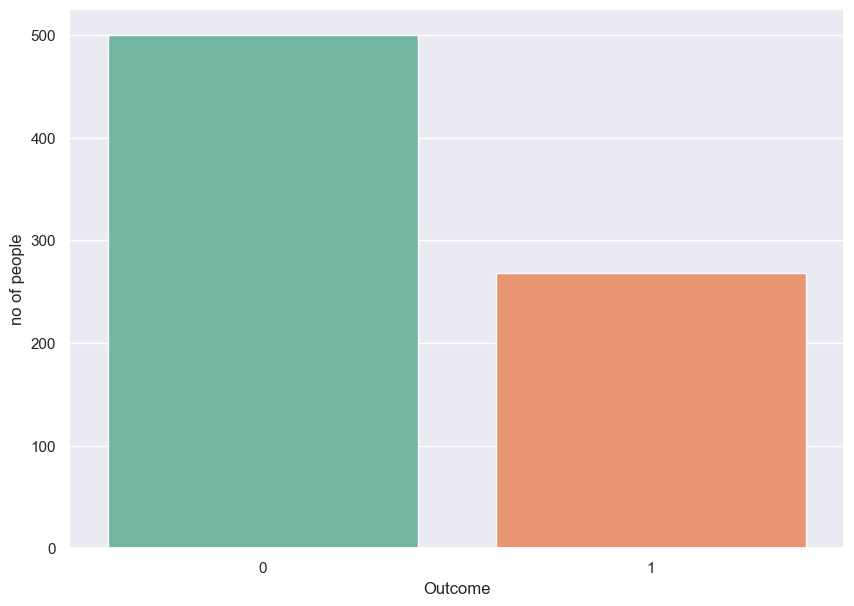

In [20]:
#checking the distribution of data in target variable using bar graph

plt.figure(figsize=(10,7))
sns.set(font_scale=1)
sns.countplot(x="Outcome",data=data,palette="Set2")
plt.ylabel("no of people")

In [21]:
#checking if the data has missing values or not

data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [22]:
#seperating the dependent as x and independent variables as y
x=data.drop('Outcome',axis=1)
y=data['Outcome']

In [24]:
#scalling the dataset

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_x=scaler.fit_transform(x)

In [28]:
#splitting the dataset into train and test data

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
y_train.head(10)
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(614, 8) (614,) (154, 8) (154,)


In [39]:
#fitting classifier to the training dataset

from sklearn.linear_model import LogisticRegression as LR
classifier = LR(class_weight="balanced")
classifier.fit(x_train,y_train)

E:\Program Files\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced')

In [30]:
#predicting the test set results
predicted_values=classifier.predict(x_test)#predicting class
predicteed_probabilities=classifier.predict_proba(x_test)#predicting probabilities

print(predicted_values)
print(predicteed_probabilities)

[1 0 0 1 0 0 1 1 1 0 1 1 1 1 0 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1
 0 0 1 0 0 0 1 1 0 0 0 1 0 1 0 1 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 0 0 1 0 1
 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 1 1 0 0 0 1 0
 0 1 1 1 1 0 1 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0 1 1 1 0 1 1 0 0 1 0 0 0 0 0 0
 0 0 0 1 0 0]
[[0.01587052 0.98412948]
 [0.74598517 0.25401483]
 [0.82611283 0.17388717]
 [0.23263254 0.76736746]
 [0.74498358 0.25501642]
 [0.9325116  0.0674884 ]
 [0.13669451 0.86330549]
 [0.06376006 0.93623994]
 [0.26488032 0.73511968]
 [0.51167251 0.48832749]
 [0.25938804 0.74061196]
 [0.01890533 0.98109467]
 [0.48934785 0.51065215]
 [0.46543042 0.53456958]
 [0.75287029 0.24712971]
 [0.67463539 0.32536461]
 [0.08184401 0.91815599]
 [0.94873893 0.05126107]
 [0.43710043 0.56289957]
 [0.6006543  0.3993457 ]
 [0.23204593 0.76795407]
 [0.39824124 0.60175876]
 [0.55509754 0.44490246]
 [0.89247104 0.10752896]
 [0.8970952  0.1029048 ]
 [0.49597671 0.50402329]
 [0.89685702 0.10314298]
 [0.0384700

In [31]:
#importing confusion matrix

from sklearn.metrics import confusion_matrix
cf=confusion_matrix(y_test,predicted_values)
print(cf)

[[82 25]
 [ 9 38]]


In [35]:
#calculating accuracy
acc=classifier.score(x_test,y_test)
print(acc)
#calculating precision
from sklearn.metrics import precision_score
precision=precision_score(y_test,predicted_values)
print(precision)
#calculating recall
from sklearn.metrics import recall_score
recall=recall_score(y_test,predicted_values)
print(recall)
#claculatinf f1 score
from sklearn.metrics import f1_score
f1=f1_score(y_test,predicted_values)
print(f1)

0.7792207792207793
0.6031746031746031
0.8085106382978723
0.6909090909090909


In [38]:
#final report

from sklearn.metrics import classification_report
k=classification_report(y_test,predicted_values)
print(k)

              precision    recall  f1-score   support

           0       0.90      0.77      0.83       107
           1       0.60      0.81      0.69        47

    accuracy                           0.78       154
   macro avg       0.75      0.79      0.76       154
weighted avg       0.81      0.78      0.79       154



In [40]:
from tensorflow import lite
converter = lite.TFLiteConverter.from_keras_model(classifier)
tfmodel = converter.convert()
open('diabetes.tflite','wb').write(tfmodel)

ModuleNotFoundError: No module named 'tensorflow'